# Image Processing

## Import Required Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib

## Lecture 1 **(Spatial Domain)**

### How computer see the image

RGB image shape: (400, 700, 3)


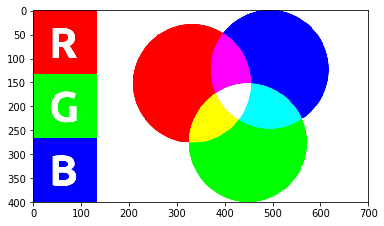

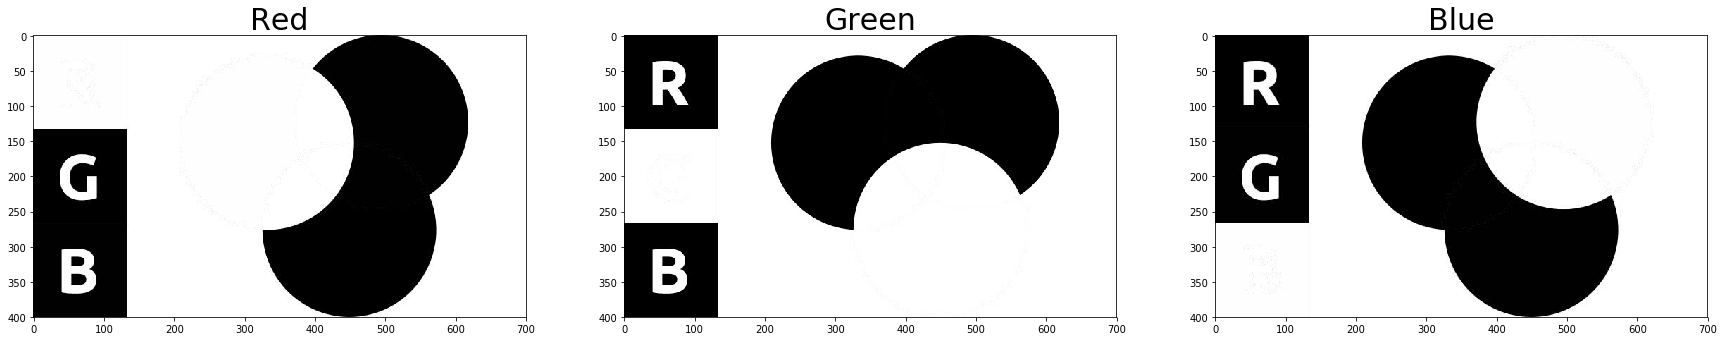

In [2]:
RGBimg=mpimg.imread('lecture1_images/RGB.jpg')
plt.imshow(RGBimg)
print('RGB image shape:',RGBimg.shape)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,10))
ax1.imshow(RGBimg[:,:,0], cmap='gray')
ax1.set_title('Red', fontsize=30)
ax2.imshow(RGBimg[:,:,1], cmap='gray')
ax2.set_title('Green', fontsize=30)
ax3.imshow(RGBimg[:,:,2], cmap='gray')
ax3.set_title('Blue', fontsize=30)
plt.show()

### This course deals with grayscale images
Let's transform the image to grayscale

gray image shape: (400, 700)


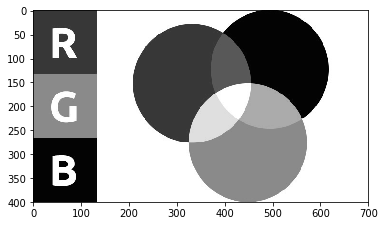

In [3]:
grayimg=cv2.cvtColor(RGBimg, cv2.COLOR_RGB2GRAY)
plt.imshow(grayimg, Cmap='gray')
print('gray image shape:',grayimg.shape)
plt.show()

#### Gray Levels Intuation

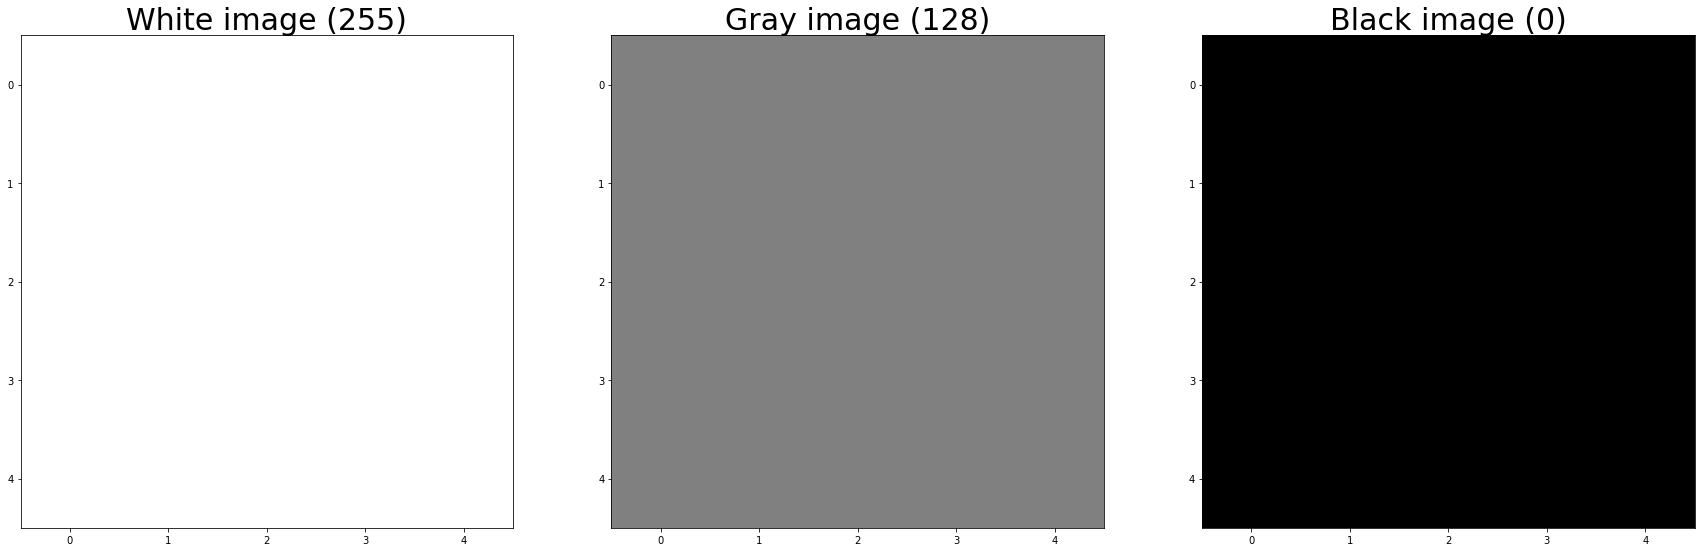

In [4]:
white=255*np.ones([5,5],np.uint8)
gray=128*np.ones([5,5],np.uint8)
black=np.zeros([5,5],np.uint8)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,10))
ax1.imshow(white, cmap='gray',vmin=0, vmax=255)
ax1.set_title('White image (255)', fontsize=30)
ax2.imshow(gray, cmap='gray',vmin=0, vmax=255)
ax2.set_title('Gray image (128)', fontsize=30)
ax3.imshow(black, cmap='gray',vmin=0, vmax=255)
ax3.set_title('Black image (0)', fontsize=30)
plt.show()


### Convolution on slides

### Smothing(Bluring) Filter (Average Filter or Gaussian filter)

#### built-in filter

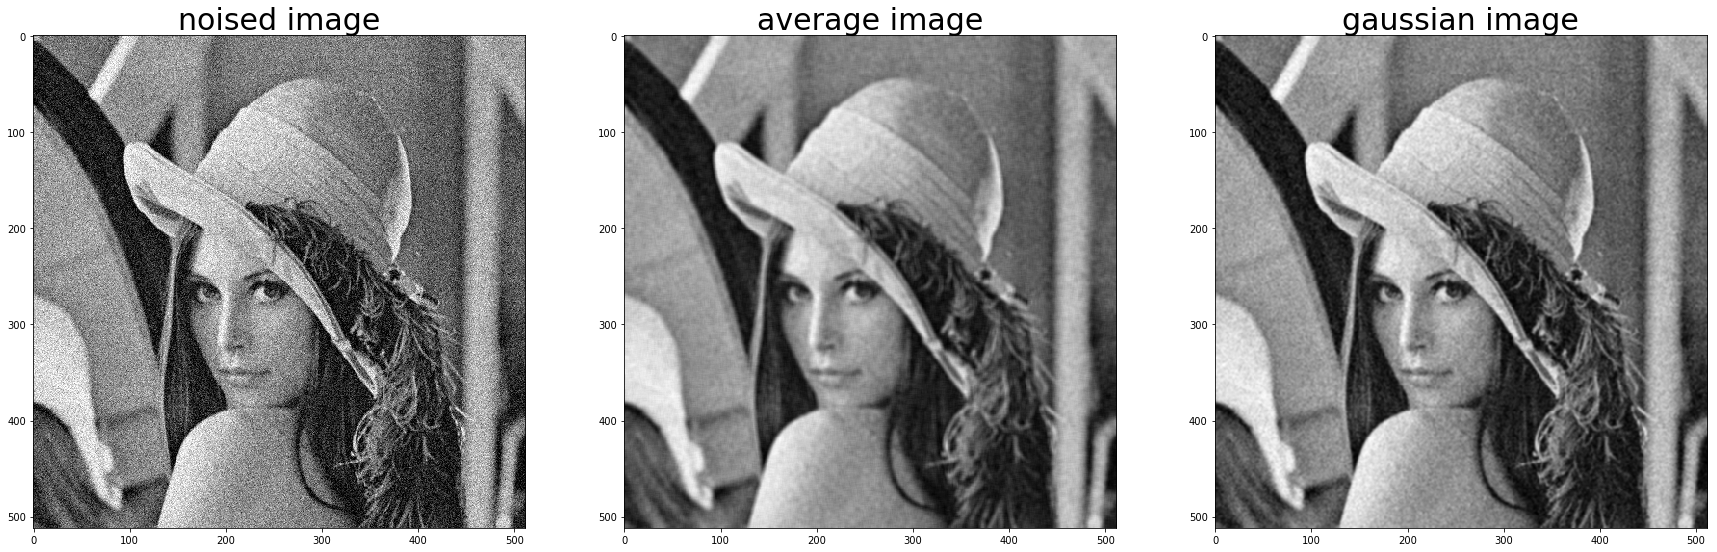

In [5]:
lenna_noise=mpimg.imread('lecture1_images/lenna_noise.jpg')
average_lenna = cv2.blur(lenna_noise,(5,5))
gaussian_lenna=cv2.GaussianBlur(lenna_noise,(5,5),0)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,10))
ax1.imshow(lenna_noise, cmap='gray')
ax1.set_title('noised image', fontsize=30)
ax2.imshow(average_lenna, cmap='gray')
ax2.set_title('average image', fontsize=30)
ax3.imshow(gaussian_lenna, cmap='gray')
ax3.set_title('gaussian image', fontsize=30)
plt.show()


#### Hand-made filters

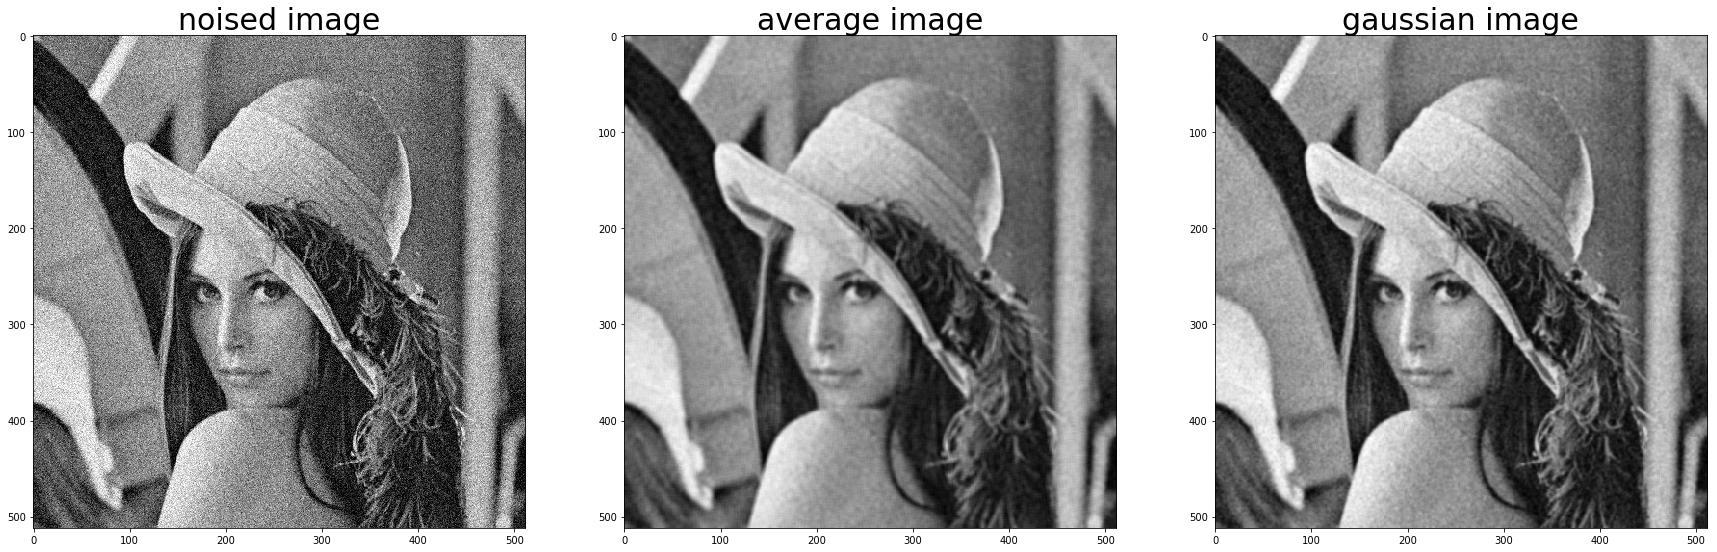

In [6]:
lenna_noise=mpimg.imread('lecture1_images/lenna_noise.jpg')

average = np.ones((5,5),np.float32)/25
gaussian=np.array([[1,2,4,2,1],
                   [2,4,8,4,2],
                   [4,8,16,8,4],
                   [2,4,8,4,2],
                   [1,2,4,2,1]],np.float32)/100

average_lenna = cv2.filter2D(lenna_noise,-1,average)
gaussian_lenna= cv2.filter2D(lenna_noise,-1,gaussian)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,10))
ax1.imshow(lenna_noise, cmap='gray')
ax1.set_title('noised image', fontsize=30)
ax2.imshow(average_lenna, cmap='gray')
ax2.set_title('average image', fontsize=30)
ax3.imshow(gaussian_lenna, cmap='gray')
ax3.set_title('gaussian image', fontsize=30)
plt.show()


### Non linear filters (Median,Maximum,Minimum)

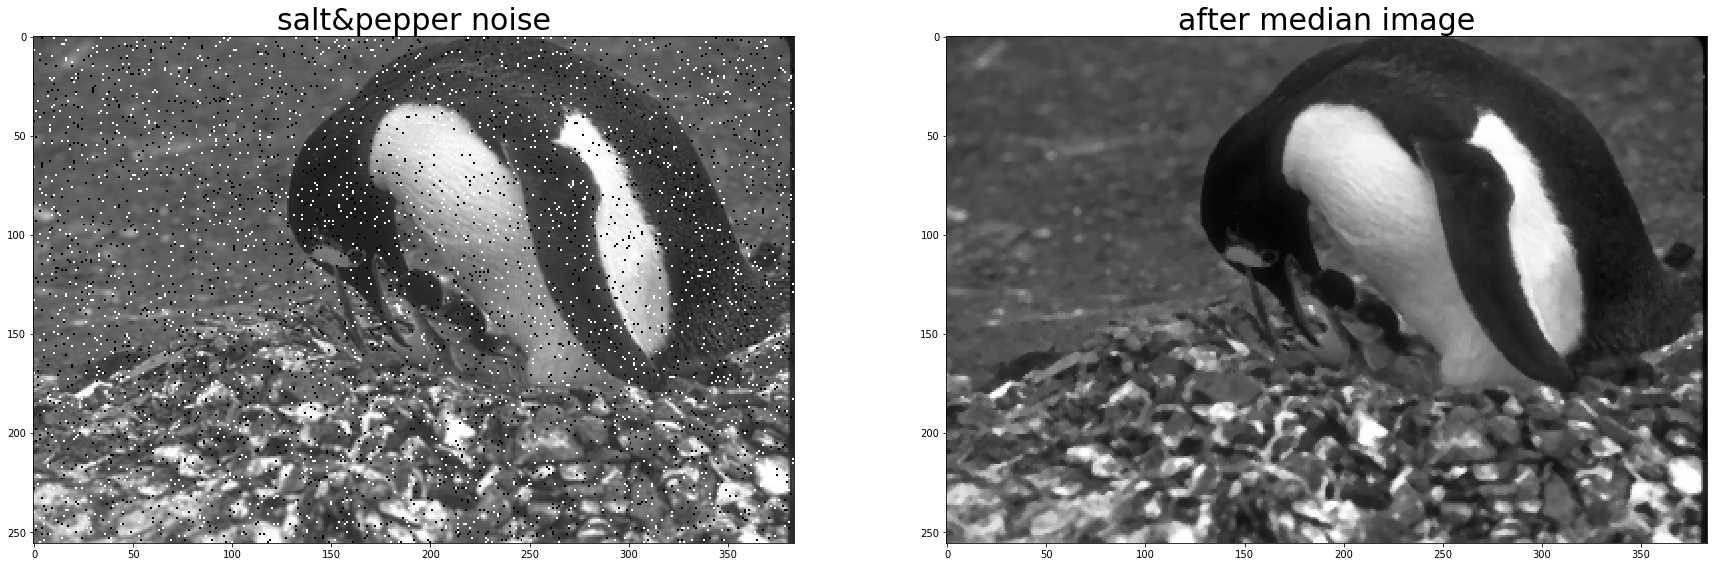

In [7]:
salt_pepper=mpimg.imread('lecture1_images/salt_pepper.jpg')
medianImg = cv2.medianBlur(salt_pepper,3)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10))
ax1.imshow(salt_pepper, cmap='gray')
ax1.set_title('salt&pepper noise', fontsize=30)
ax2.imshow(medianImg, cmap='gray')
ax2.set_title('after median image', fontsize=30)
plt.show()


### Laplacian Filter(edge detection)

#### built-in filter

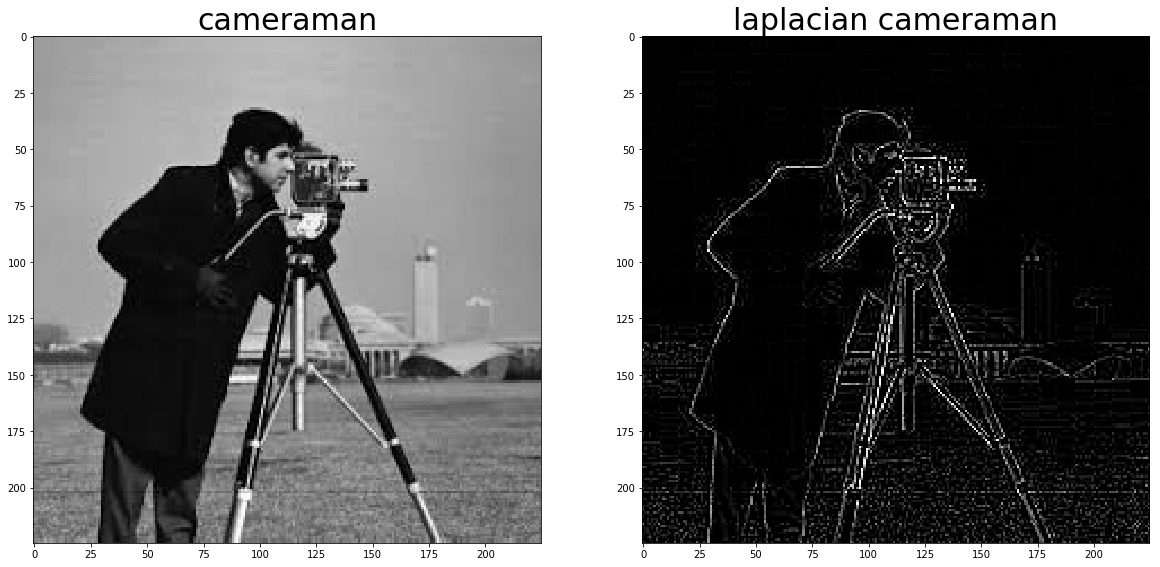

In [8]:
cameraman=mpimg.imread('lecture1_images/cameraman.jpg')
cameraman=cv2.cvtColor(cameraman, cv2.COLOR_RGB2GRAY)

laplacian_builtin = cv2.Laplacian(cameraman,-1)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(cameraman, cmap='gray')
ax1.set_title('cameraman', fontsize=30)
ax2.imshow(laplacian_builtin, cmap='gray')
ax2.set_title('laplacian cameraman', fontsize=30)
plt.show()


#### Hand-made filters

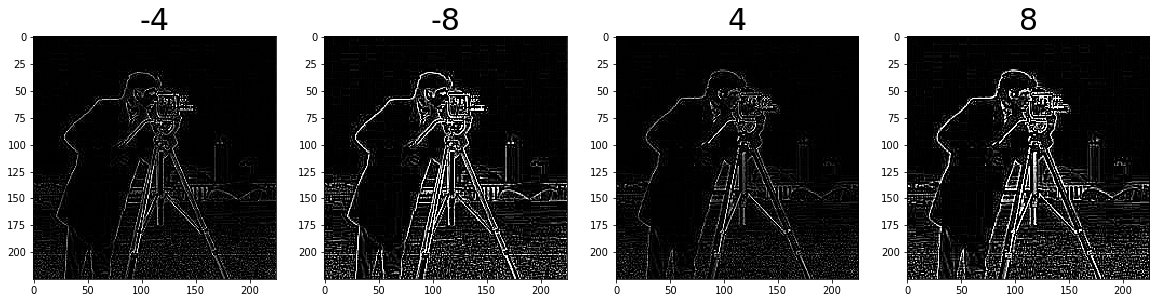

In [9]:
cameraman=mpimg.imread('lecture1_images/cameraman.jpg')
cameraman=cv2.cvtColor(cameraman, cv2.COLOR_RGB2GRAY)

laplacian1=np.array([[0,1,0],
                   [1,-4,1],
                   [0,1,0]])

laplacian2=np.array([[1,1,1],
                   [1,-8,1],
                   [1,1,1]])

laplacian3=np.array([[0,-1,0],
                   [-1,4,-1],
                   [0,-1,0]])

laplacian4=np.array([[-1,-1,-1],
                   [-1,8,-1],
                   [-1,-1,-1]])

laplacian_handmade1 = cv2.filter2D(cameraman,-1,laplacian1)
laplacian_handmade2 = cv2.filter2D(cameraman,-1,laplacian2)
laplacian_handmade3 = cv2.filter2D(cameraman,-1,laplacian3)
laplacian_handmade4 = cv2.filter2D(cameraman,-1,laplacian4)

f, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20,20))
ax1.imshow(laplacian_handmade1, cmap='gray')
ax1.set_title('-4', fontsize=30)
ax2.imshow(laplacian_handmade2, cmap='gray')
ax2.set_title('-8', fontsize=30)
ax3.imshow(laplacian_handmade3, cmap='gray')
ax3.set_title('4', fontsize=30)
ax4.imshow(laplacian_handmade4, cmap='gray')
ax4.set_title('8', fontsize=30)
plt.show()


### Sharpening Filters(edge detection)

#### hand-made filter

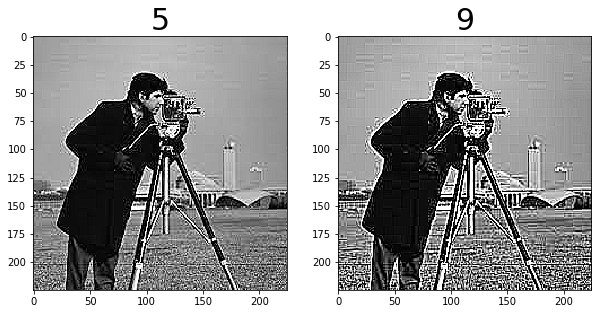

In [10]:
cameraman=mpimg.imread('lecture1_images/cameraman.jpg')
cameraman=cv2.cvtColor(cameraman, cv2.COLOR_RGB2GRAY)

sharpen1=np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])

sharpen2=np.array([[-1,-1,-1],
                   [-1,9,-1],
                   [-1,-1,-1]])

sharpen_handmade1 = cv2.filter2D(cameraman,-1,sharpen1)
sharpen_handmade2 = cv2.filter2D(cameraman,-1,sharpen2)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,20))
ax1.imshow(sharpen_handmade1, cmap='gray')
ax1.set_title('5', fontsize=30)
ax2.imshow(sharpen_handmade2, cmap='gray')
ax2.set_title('9', fontsize=30)
plt.show()


### Image Enhancement

#### Threshold

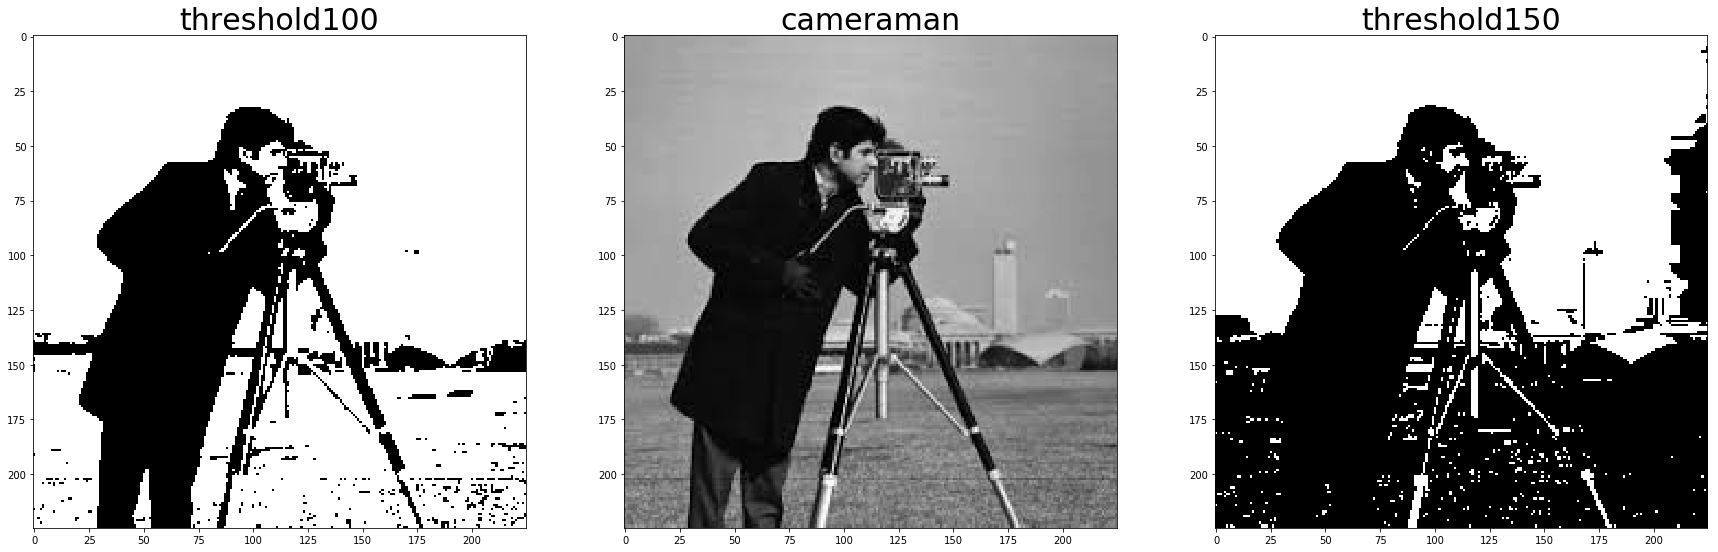

In [11]:
cameraman=mpimg.imread('lecture1_images/cameraman.jpg')
cameraman=cv2.cvtColor(cameraman, cv2.COLOR_RGB2GRAY)

threshold100=np.zeros_like(cameraman)
threshold150=np.zeros_like(cameraman)
threshold100[cameraman>=100]=255
threshold150[cameraman>=150]=255

f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(30,10))
ax1.imshow(threshold100, cmap='gray')
ax1.set_title('threshold100', fontsize=30)
ax2.imshow(cameraman, cmap='gray')
ax2.set_title('cameraman', fontsize=30)
ax3.imshow(threshold150, cmap='gray')
ax3.set_title('threshold150', fontsize=30)
plt.show()


#### Log

`brigter=log2(1+x)`
`darker=1-log2(2-x)`
`x=[0:1]`

brighter= 175.60349244 original= 156 darker= 134.320711128


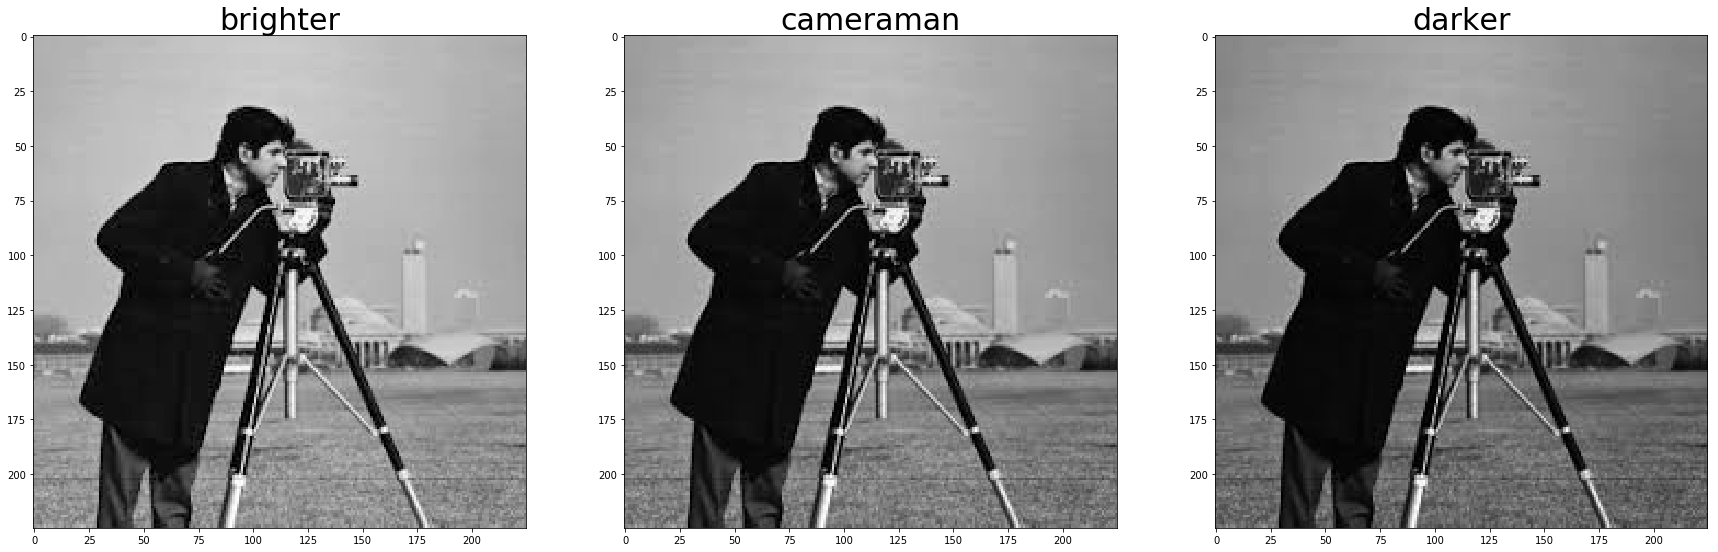

In [12]:
cameraman=mpimg.imread('lecture1_images/cameraman.jpg')
cameraman=cv2.cvtColor(cameraman, cv2.COLOR_RGB2GRAY)

darker=255*(1- np.log2(2-(cameraman/255)))
brighter=255*(np.log2(1+(cameraman/255)))
f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(30,10))
ax1.imshow(brighter, cmap='gray')
ax1.set_title('brighter', fontsize=30)
ax2.imshow(cameraman, cmap='gray')
ax2.set_title('cameraman', fontsize=30)
ax3.imshow(darker, cmap='gray')
ax3.set_title('darker', fontsize=30)
print('brighter=',brighter[0,0],'original=',cameraman[0,0],'darker=',darker[0,0])
plt.show()


#### Gamma Correction

`brigter=x^gamma, gamma<1`
`darker=x^gamma, gamma>1`
`x=[0:1]`

brighter= 199.449241663 original= 156 darker= 35.7172367189


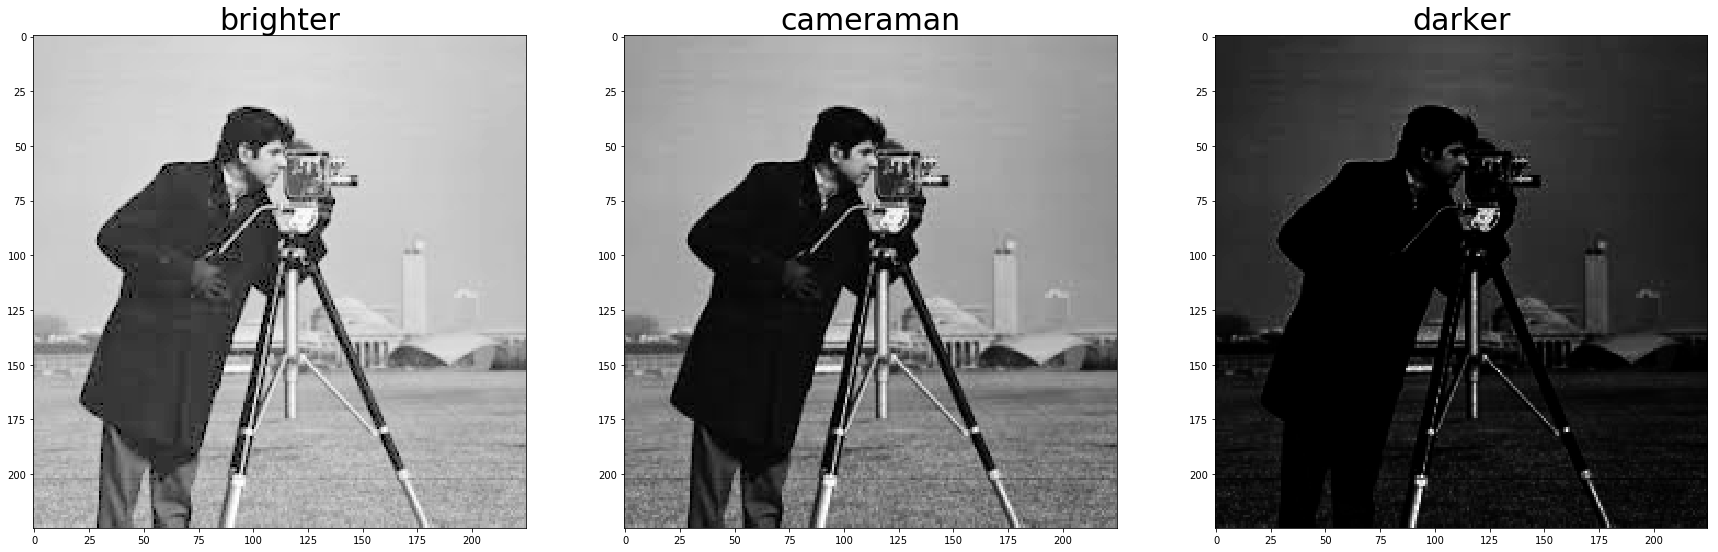

In [13]:
cameraman=mpimg.imread('lecture1_images/cameraman.jpg')
cameraman=cv2.cvtColor(cameraman, cv2.COLOR_RGB2GRAY)

darker=255*( np.power((cameraman/255),4))
brighter=255*( np.power((cameraman/255),0.5))
f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(30,10))
ax1.imshow(brighter, cmap='gray')
ax1.set_title('brighter', fontsize=30)
ax2.imshow(cameraman, cmap='gray')
ax2.set_title('cameraman', fontsize=30)
ax3.imshow(darker, cmap='gray')
ax3.set_title('darker', fontsize=30)
print('brighter=',brighter[0,0],'original=',cameraman[0,0],'darker=',darker[0,0])
plt.show()


#### Contrast

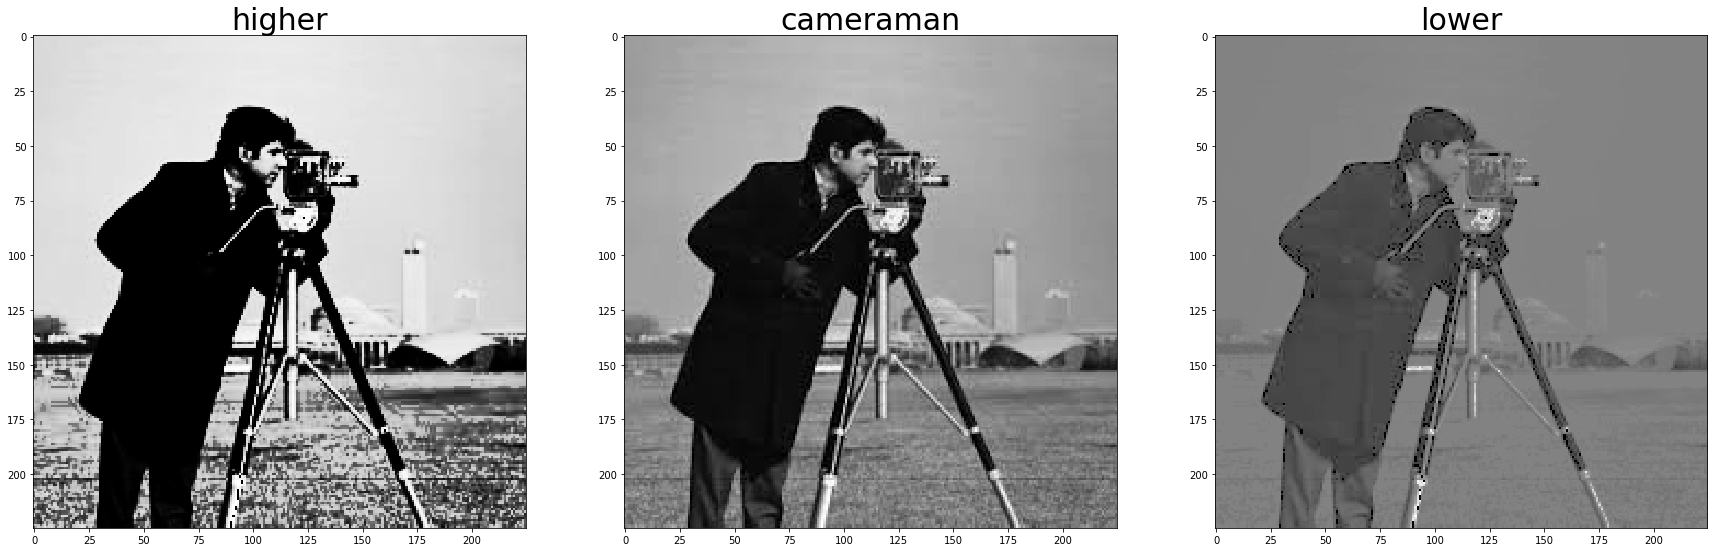

In [14]:
cameraman=mpimg.imread('lecture1_images/cameraman.jpg')
cameraman=cv2.cvtColor(cameraman, cv2.COLOR_RGB2GRAY)

higher=np.zeros_like(cameraman)
lower=np.zeros_like(cameraman)
higher[cameraman<=127]=255*( np.power(2*(cameraman[cameraman<=127]/255),4))/2
higher[cameraman>=127]=255*((( np.power(2*((cameraman[cameraman>=127]-127)/255),0.25))/2)+127)
lower[cameraman<=127]=255*( np.power(2*(cameraman[cameraman<=127]/255),0.25))/2
lower[cameraman>=127]=255*((( np.power(2*((cameraman[cameraman>=127]-127)/255),4))/2)+127)

f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(30,10))
ax1.imshow(higher, cmap='gray')
ax1.set_title('higher', fontsize=30)
ax2.imshow(cameraman, cmap='gray')
ax2.set_title('cameraman', fontsize=30)
ax3.imshow(lower, cmap='gray')
ax3.set_title('lower', fontsize=30)
plt.show()


## Lecture 2 (Frequency Domain)

convert to frequency domain

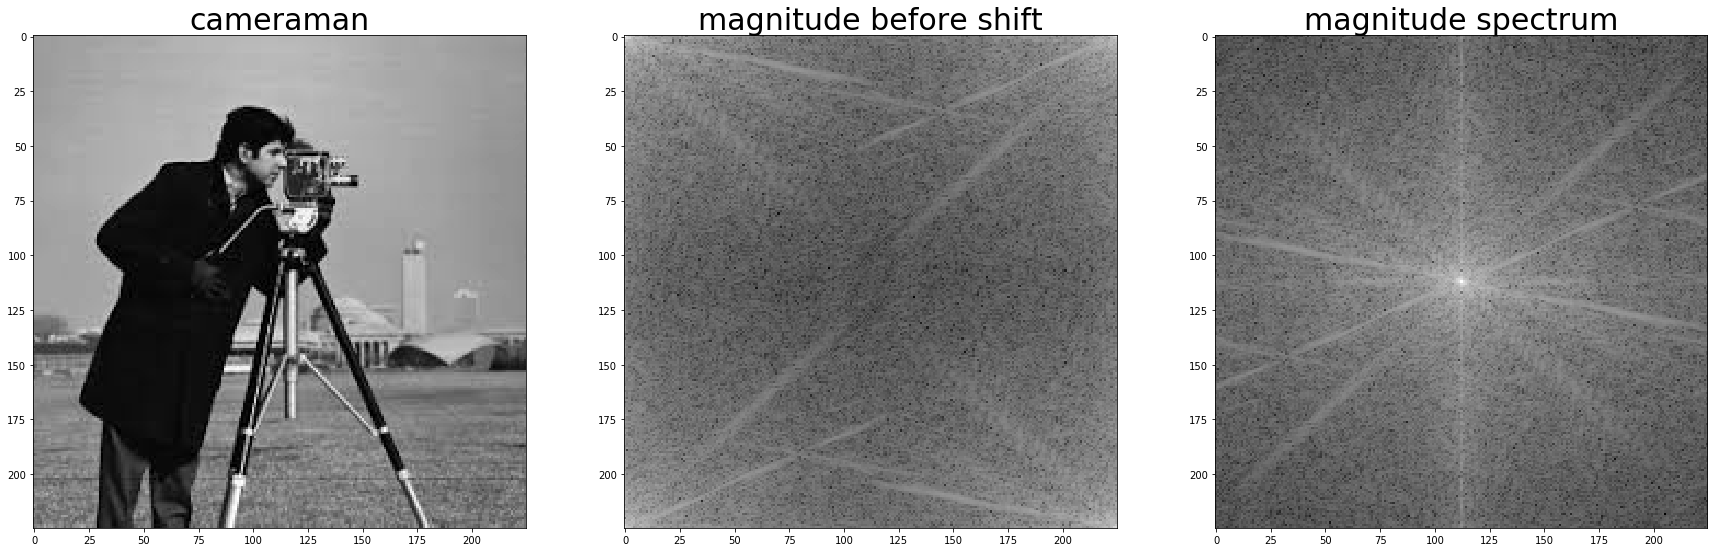

In [15]:
cameraman=mpimg.imread('lecture1_images/cameraman.jpg')
cameraman=cv2.cvtColor(cameraman, cv2.COLOR_RGB2GRAY)

f = np.fft.fft2(cameraman)
fshift = np.fft.fftshift(f)
magnitude_before_shift=20*np.log(np.abs(f))
magnitude_spectrum = 20*np.log(np.abs(fshift))

f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(30,10))
ax1.imshow(cameraman, cmap='gray')
ax1.set_title('cameraman', fontsize=30)
ax2.imshow(magnitude_before_shift, cmap='gray')
ax2.set_title('magnitude before shift', fontsize=30)
ax3.imshow(magnitude_spectrum, cmap='gray')
ax3.set_title('magnitude spectrum', fontsize=30)
plt.show()

### Notch filter

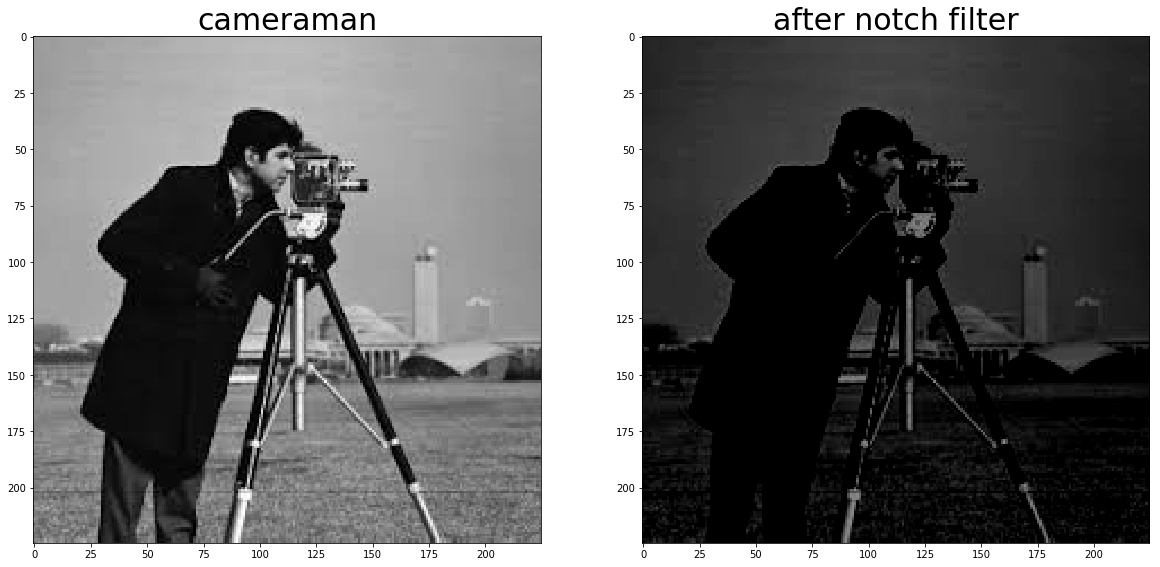

In [16]:
cameraman=mpimg.imread('lecture1_images/cameraman.jpg')
cameraman=cv2.cvtColor(cameraman, cv2.COLOR_RGB2GRAY)

f = np.fft.fft2(cameraman)
fshift = np.fft.fftshift(f)
fshift[cameraman.shape[0]//2,cameraman.shape[1]//2]=0
ifshift=np.fft.ifftshift(fshift)
iff=np.fft.ifft2(ifshift)
iff=np.real(iff)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(cameraman, cmap='gray',vmin=0, vmax=255)
ax1.set_title('cameraman', fontsize=30)
ax2.imshow(iff, cmap='gray',vmin=0, vmax=255)
ax2.set_title('after notch filter', fontsize=30)
plt.show()

### Low Pass Filter

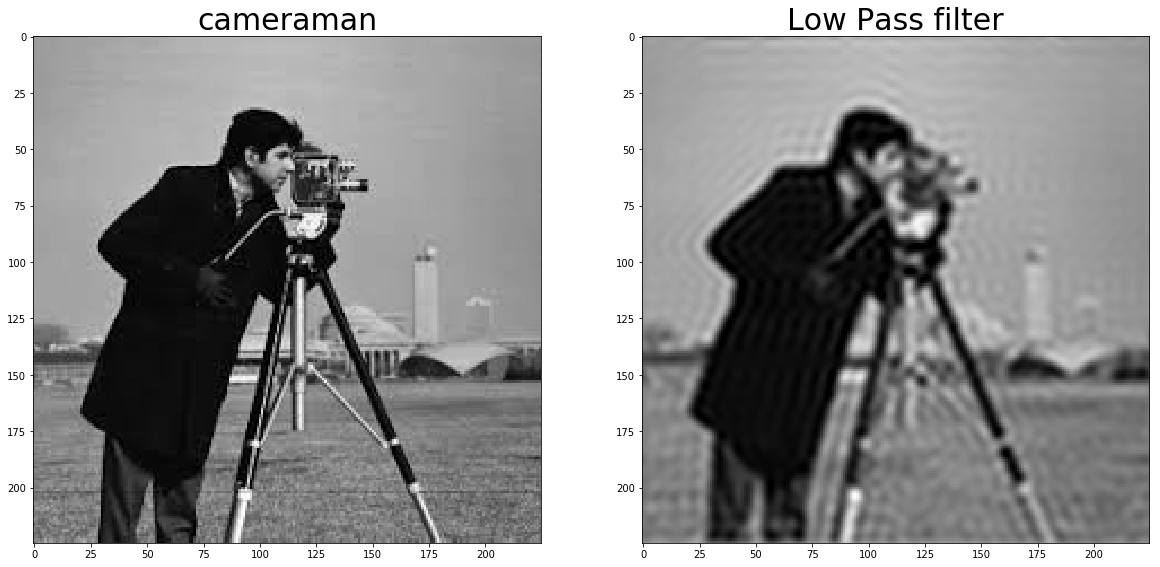

In [17]:
cameraman=mpimg.imread('lecture1_images/cameraman.jpg')
cameraman=cv2.cvtColor(cameraman, cv2.COLOR_RGB2GRAY)

rows, cols = cameraman.shape
crow,ccol = rows//2 , cols//2
mask = np.zeros((rows,cols),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

f = np.fft.fft2(cameraman)
fshift = np.fft.fftshift(f)
fshift=fshift*mask
ifshift=np.fft.ifftshift(fshift)
iff=np.fft.ifft2(ifshift)
iff=np.real(iff)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(cameraman, cmap='gray',vmin=0, vmax=255)
ax1.set_title('cameraman', fontsize=30)
ax2.imshow(iff, cmap='gray',vmin=0, vmax=255)
ax2.set_title('Low Pass filter', fontsize=30)
plt.show()

### High Pass Filter

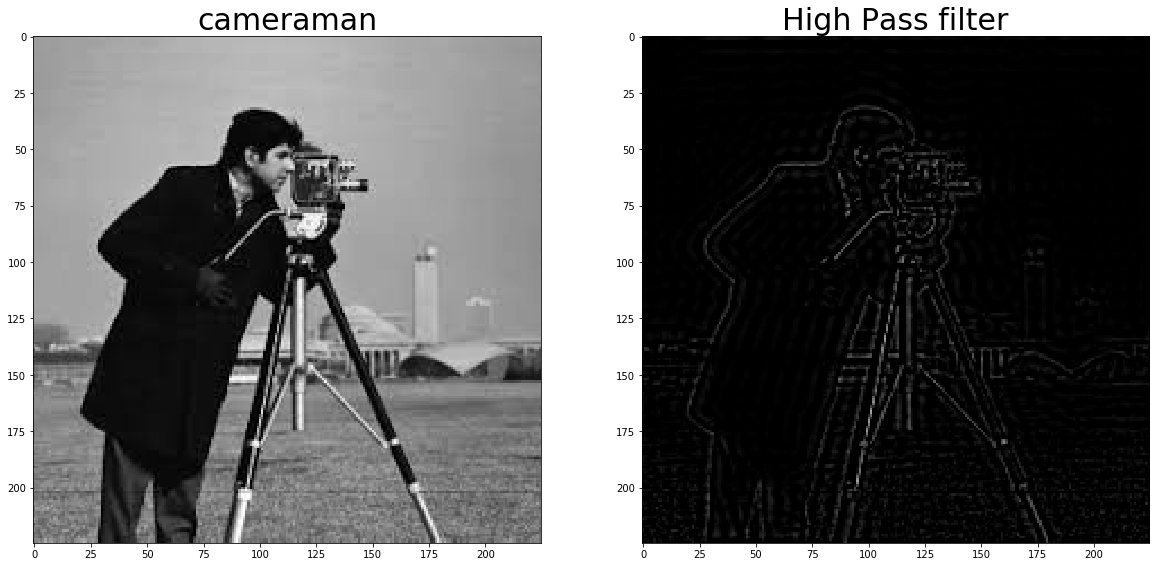

In [18]:
cameraman=mpimg.imread('lecture1_images/cameraman.jpg')
cameraman=cv2.cvtColor(cameraman, cv2.COLOR_RGB2GRAY)

rows, cols = cameraman.shape
crow,ccol = rows//2 , cols//2
mask = np.ones((rows,cols),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 0

f = np.fft.fft2(cameraman)
fshift = np.fft.fftshift(f)
fshift=fshift*mask
ifshift=np.fft.ifftshift(fshift)
iff=np.fft.ifft2(ifshift)
iff=np.real(iff)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(cameraman, cmap='gray',vmin=0, vmax=255)
ax1.set_title('cameraman', fontsize=30)
ax2.imshow(iff, cmap='gray',vmin=0, vmax=255)
ax2.set_title('High Pass filter', fontsize=30)
plt.show()